In [ ]:
# Declan Halbert CS237 Lab 2
# BU ID: U79196431
# Email: dhalbert@bu.edu

# CS237 Lab 2: Simulation of Random Experiments Continued
In this second lab we will continue with our theme of simulating random experiments to verify our theoretical analysis from lecture. We will focus on the Monty Hall problem that was covered in lecture this week. We will study a generalized version of the game in which there are N doors and the host opens K doors (in the original problem, N = 3 and K = 1, but the game works for more general situations). The goal is to determine empirically which is the better strategy: switch or stay?


# Description of the Generalized Monty Hall Game
 The game is played as follows:
- There are $N$ doors for $N\ge3$.
- Behind exactly one of the doors is a prize (e.g., a car).
- The goal of the game is to select the door with the prize behind it. 
- Once you have made a selection, the host, who knows where the prize is, will open  $K$ doors, for $1\le K\le N-2$, that you did not select, and that do not contain the prize.  
- You are then given the option to  pick a new door. The goal of this first section is to determine whether or not you should swap doors by using numpy to simulate this game. 

We will break this game up into a sequence of problems.

In [3]:
# CS 237: Lab 2
#@Author: Kai Bernardini
# Jupyter notebook specific 
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

# General useful imports
import numpy as np
from numpy import arange,linspace
import matplotlib.pyplot as plt  
from numpy.random import seed, randint, uniform, choice, shuffle
from collections import Counter
import pandas as pd
%matplotlib inline

# Problem 1
 - We will use the randint function from the numpy library to simulate selecting a door randomly and equiprobably (such a choice is usually phrased as "uniformly at random"). 
 - You may assume that for $n\in\mathbb{N}, n\geq 3$ doors, their numbers are $0,1,\ldots, n-1$
 - Finish the stub for the code that initializes the game.
 - This function should return a pair <code>(doors,winning_door)</code> where
- doors is a 1D array of length <code>number_of_doors</code>, where exactly one of the elements is a 1 (the winning door), and the rest are 0 (the losing doors)
- winning_door is the index of the winning door
    
For example, if the array is [0,0,1], then the winning door is at index 2, while the losing doors are at 0,1, and the function would return ([0,0,1],2)
 


In [4]:
def select_door(number_of_doors):
    return (randint(number_of_doors))

def initialize_game(number_doors):
    doors = np.zeros(number_doors) # your code here
    winning_door = select_door(number_doors)
    doors[winning_door] = 1
    return (doors,winning_door)

# test
print( initialize_game(3) )

(array([ 0.,  0.,  1.]), 2)


# Problem 2
After the game is initialized (problem 1), the player will choose a door (this will be done in problem 4). Next, the host will open one or more doors, which we will simulate in this problem.  You must write a function <code>open_doors</code> which takes

 - doors: the list generated from <code>initialize_game</code>
 - ignore_doors: a list of doors (indices into the doors array) to exclude (i.e., the door selected by the player, and the winning door) and 
 - num_doors_to_open

You must randomly generate a list of doors (opened_doors) that the host opens; these must be chosen from doors that are NOT in the list ignore_doors. The function returns a pair <code>(opened_doors, remaining_doors)</code>, where
 - opened_doors is an array containing the indices of all doors opened. 
 - remaining_doors is an array of possible doors that were not in fact opened. 
 
Basically, the game enters this function with doors separated into doors that can not be opened by the host, and doors that the host can possibly open; the game leaves this function with a partition into three subsets: doors which must be ignored, doors randomly opened by the host, and all others. This last group is the set of doors that the player could switch to.

In the case that there are 3 doors, the function should be deterministic for a fixed array. 

In [5]:
# HINT: use the choice function from the reading!
# Example: try changing size, which is another way of specifying the length of a 1D array

print(choice([1,'suh','dude'], replace=False, size=1))

['dude']


In [6]:
def open_doors(doors, ignore_doors, num_doors_to_open):
    next_doors = [i for i in range(len(doors)) if i not in ignore_doors]
    return choice(next_doors, replace=False, size=num_doors_to_open)

# Problem 3
Now that the game has been initialized, the player has chosen a door, and the host has opened some number of doors, we must figure out what the player will do: will he trade his choice (open a remaining door other than his original choice, chosen randomly? Will he keep his original choice? Or will he flip a coin to decide which of these two strategies he will use?  This function will perform this choice, depending on the strategy input.

The function new_door_choice should take as input:
    - swap_behavior: the strategy the player uses encoded as an integer:
        - Always trade (0): the player will trade no matter what, and randomly select a remaining door. 
        - Never trade (1): the player will always keep his initial choice.
        - Randomly trade (2): the player flips a fair coin:
            - if heads, he trades his door;
            - if tails, he keeps his current choice.
    - current_door: the door currently selected by the player, and 
    - rem_doors: a list of the doors the player can choose from if he decides to trade. 
 
The function should return the index at which the newly selected door is located. If the strategy is 1, then this will be the current_door.


In [37]:
def new_door_choice(swap_behavior, current_door, rem_doors):
    if swap_behavior == 0:
        x = randint(len(rem_doors))
        return rem_doors[x]
    elif swap_behavior == 2:
        x = randint(0,2)
        if x == 1:
            return current_door
        if x == 0:
            return rem_doors[randint(len(rem_doors))]
    else:
        return current_door
        
new_door_choice(0, 3, [0, 2, 10, 15, 16, 17])

10

In [8]:
#test 
x = randint(0,2)
print(x)

0


# Problem 4: Putting it all together
- Implement the function below to simulate playing 1 round of the Monty Hall game. 
- It should first initialize the doors (problem 1)
- Then select the players choice (randomly choose a door).
- The host will then open one or more doors (problem 2)
- Finally, the player either keeps his door or trades (problem 3)
- The function should return a boolean value:
    - True if the player won the prize
    - False if he doesn't

In [42]:
def game(swap_behavior = 0,   num_doors=3, num_doors_to_open=1):
    
    y = initialize_game(num_doors) #Step 1
    doors = y[0]
    x = select_door(len(doors))
    ignore_doors = [y[1],x]
    host_opens = open_doors(doors, ignore_doors , num_doors_to_open)
    next_doors = [i for i in range(len(doors)) if i not in host_opens and i != x]
    
    last_step = new_door_choice(swap_behavior, x, next_doors)
    return doors[last_step]==1

Counter([game(swap_behavior=0) for i in range(1000)])

Counter({False: 496, True: 504})

# Problem 5 (A)
- Simulate playing the game 10,000 times for each strategy with 3 doors, and 1 opened door. 
- Display a histogram to determine which strategy has the highest chance of winning (code provided for you below).  
- To do this, build a function to determine the probability of winning for each of the three strategies.
Note if you do not use numpy, this next step will take a long time.

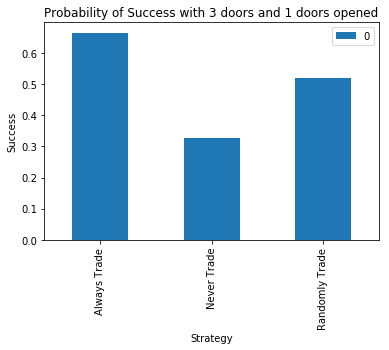

In [86]:
def simulate_with_strategy( swap_behavior = 0,   num_doors=3, num_doors_to_open=1 ,N=10000):    
    x = Counter([game(swap_behavior,num_doors,num_doors_to_open) for i in range(1000)])
    y = x[1]/N
    return y

# Don't touch the rest of this cell unless you know what you are doing
strategy_map = {0: "Always Trade", 1: "Never Trade", 2: "Randomly Trade"}

def evaluate_strategy(num_doors=3, num_doors_to_open=1 ,N=1000):
    success = { }
    for i in range(3):
        success[ strategy_map[i]] = simulate_with_strategy(swap_behavior=i,
                                           num_doors=num_doors, num_doors_to_open=num_doors_to_open, N=N)
           
    df = pd.DataFrame.from_dict( success, orient='index')
    # results 
    df.plot.bar()
    plt.title("Probability of Success with " + str(num_doors)+ " doors and " + str(num_doors_to_open) + " doors opened" )
    plt.xlabel("Strategy")
    plt.ylabel("Success")
    plt.show()

evaluate_strategy()

# Problem 5 (B)
Use your solution to the previous problem to determine what happens as the number of doors gets large (use 1000) and the number of doors opened is small (use 1). Run this 10000 times.


Warning: This will take a minute or so to run!

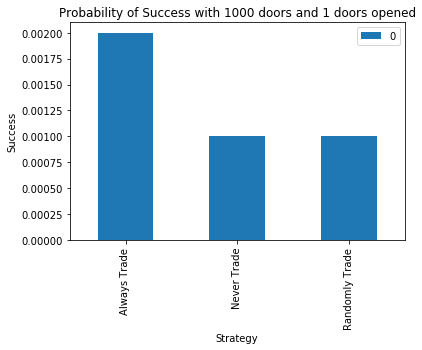

In [88]:
def simulate_with_strategy( swap_behavior = 0,   num_doors=3, num_doors_to_open=1 ,N=10000):    
    x = Counter([game(swap_behavior,num_doors,num_doors_to_open) for i in range(1000)])
    y = x[1]/N
    return y

# Don't touch the rest of this cell unless you know what you are doing
strategy_map = {0: "Always Trade", 1: "Never Trade", 2: "Randomly Trade"}

def evaluate_strategy(num_doors=1000, num_doors_to_open=1 ,N=1000):
    success = { }
    for i in range(3):
        success[ strategy_map[i]] = simulate_with_strategy(swap_behavior=i,
                                           num_doors=num_doors, num_doors_to_open=num_doors_to_open, N=N)
           
    df = pd.DataFrame.from_dict( success, orient='index')
    # results 
    df.plot.bar()
    plt.title("Probability of Success with " + str(num_doors)+ " doors and " + str(num_doors_to_open) + " doors opened" )
    plt.xlabel("Strategy")
    plt.ylabel("Success")
    plt.show()

evaluate_strategy()

# Problem 5 (C)
As in the previous problem, use the evaluate_strategy function to determine what happens as the number of doors gets large (use 1000) and the number of doors opened is also large (use 998). Run this 10000 times. 

Warning: This will take a couple of minutes to run!

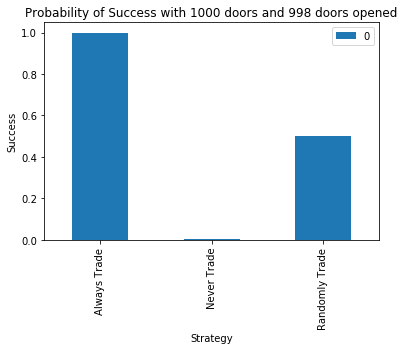

In [89]:
def simulate_with_strategy( swap_behavior = 0,   num_doors=3, num_doors_to_open=1 ,N=10000):    
    x = Counter([game(swap_behavior,num_doors,num_doors_to_open) for i in range(1000)])
    y = x[1]/N
    return y

# Don't touch the rest of this cell unless you know what you are doing
strategy_map = {0: "Always Trade", 1: "Never Trade", 2: "Randomly Trade"}

def evaluate_strategy(num_doors=1000, num_doors_to_open=998 ,N=1000):
    success = { }
    for i in range(3):
        success[ strategy_map[i]] = simulate_with_strategy(swap_behavior=i,
                                           num_doors=num_doors, num_doors_to_open=num_doors_to_open, N=N)
           
    df = pd.DataFrame.from_dict( success, orient='index')
    # results 
    df.plot.bar()
    plt.title("Probability of Success with " + str(num_doors)+ " doors and " + str(num_doors_to_open) + " doors opened" )
    plt.xlabel("Strategy")
    plt.ylabel("Success")
    plt.show()

evaluate_strategy()

# Challenge Problem (no credit, but we'll be impressed!)
Come up with a general solution to the Monty Hall problem. In particular, identify the optimal strategy. Then find the probability success subject to  
- There are $n$ doors 
- $m$ doors are opened
- the player randomly selects a door